1. import library-library yang diperlukan untuk permodelan Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Menentukan dan menampilkan dataset yang akan dipakai pada sebuah
dataframe. Dalam kasus ini data mobil diperoleh dari Kaggle. Amati data yang
ditampilkan

In [4]:
df_mobil = pd.read_csv("dataCar/CarPrice_Assignment.csv")
df_mobil
# [['highwaympg', 'curbweight', 'horsepower']]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


3. Cek apakah ada data yang kosong pada dataset tersebut

4. Tampilkan nilai count, mean, std, nilai min, kuartil 1 (25%), median (50%),
kuartil 3 (75%), nilai max pada dataset tersebut sehingga hasilnya pada
gambar di bawah ini.

In [3]:
numeric_data = df_mobil.select_dtypes(include=['number'])
summary = numeric_data.describe().transpose()
summary['50%'] = numeric_data.median()

summary

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


5. Tampilkan semua tipe data pada dataset tersebut.

In [4]:
print("\nTipe data pada Data set tersebut:")
for dtype in summary.dtypes.unique():
    print(f"\nType Dataset: {dtype}")
    print(summary.select_dtypes(include=[dtype]))


Tipe data pada Data set tersebut:

Type Dataset: float64
                  count          mean          std      min      25%  \
car_ID            205.0    103.000000    59.322565     1.00    52.00   
symboling         205.0      0.834146     1.245307    -2.00     0.00   
wheelbase         205.0     98.756585     6.021776    86.60    94.50   
carlength         205.0    174.049268    12.337289   141.10   166.30   
carwidth          205.0     65.907805     2.145204    60.30    64.10   
carheight         205.0     53.724878     2.443522    47.80    52.00   
curbweight        205.0   2555.565854   520.680204  1488.00  2145.00   
enginesize        205.0    126.907317    41.642693    61.00    97.00   
boreratio         205.0      3.329756     0.270844     2.54     3.15   
stroke            205.0      3.255415     0.313597     2.07     3.11   
compressionratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower        205.0    104.117073    39.544167    48.00    70.00   
peakrp

 6. Tampilkan grafik untuk menunjukkan distribusi harga mobil.

<function matplotlib.pyplot.show(close=None, block=None)>

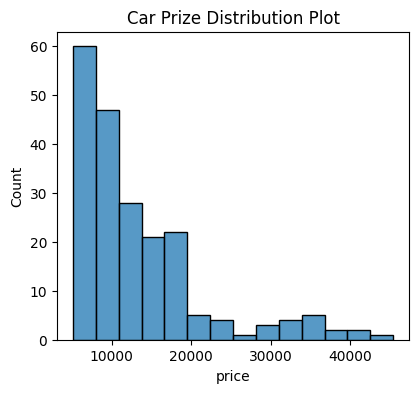

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Car Prize Distribution Plot')
sns.histplot(df_mobil['price'])

plt.show

7. Tampilkan grafik sebaran nama-nama mobil yang ada pada dataset.

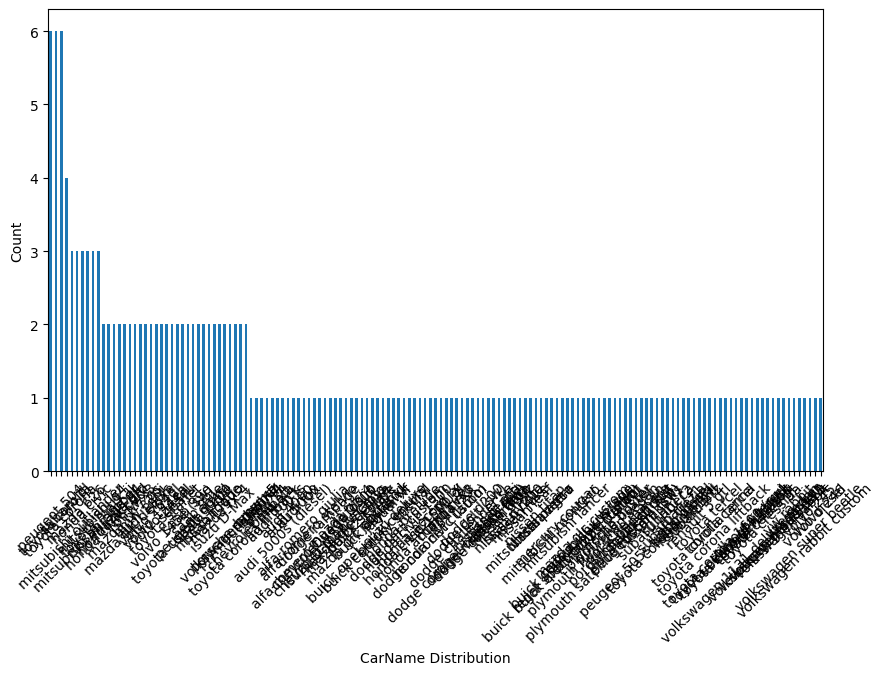

In [6]:
car_counts = df_mobil['CarName'].value_counts()

plt.figure(figsize=(10,6))
car_counts.plot(kind='bar')
plt.xlabel('CarName Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

8. Tampilkan 10 nama mobil terbanyak pada dataset.

In [7]:
top_10_cars = df_mobil['CarName'].value_counts().head(10)

print("Top 10 Car Names:")
print(top_10_cars)

Top 10 Car Names:
CarName
peugeot 504             6
toyota corolla          6
toyota corona           6
subaru dl               4
mitsubishi outlander    3
mazda 626               3
honda civic             3
mitsubishi mirage g4    3
mitsubishi g4           3
toyota mark ii          3
Name: count, dtype: int64


9. Buatkan sebuah world cloud untuk nama-nama mobil yang ada seperti pada
gambar di bawah ini.

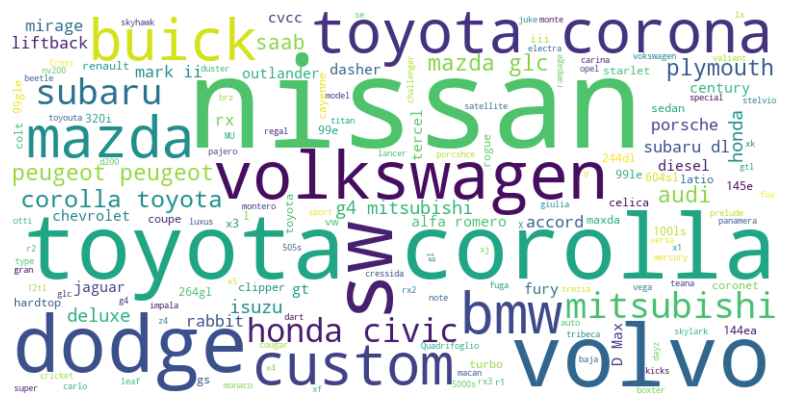

In [8]:
from wordcloud import WordCloud

car_names = df_mobil['CarName'].dropna() 
text = ' '.join(car_names)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

10. Tampilkan sebuah scatter plot untuk menunjukkan hubungan antara data highwaympg dengan price pada dataset. Jelaskan arti dari scatter plot tersebut. Scatter Plot scatter plot yang digunakan untuk menunjukkan hubungan antara data highwaympg dan price pada dataset, yang ditampilkan menggunakan library seperti matplotlib di Python. Scatter plot ini akan menunjukkan bagaimana harga mobil (price) berhubungan dengan efisiensi bahan bakar di jalan raya (highwaympg).

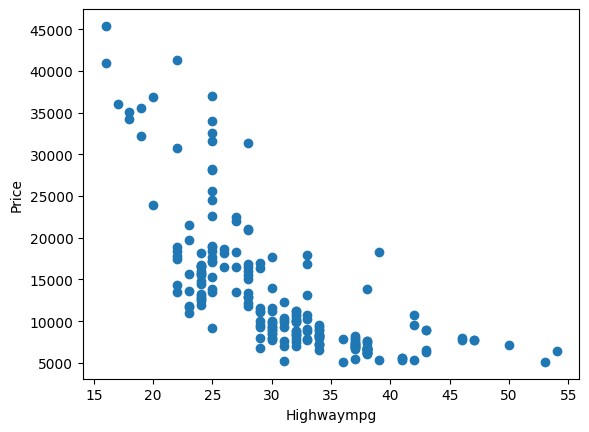

In [9]:
plt.scatter(df_mobil['highwaympg'], df_mobil['price'])
plt.xlabel('Highwaympg')
plt.ylabel('Price')
plt.show()

11. Pada kasus ini, digunakan metode Linear Regression untuk membangun
model prediksi harga mobil

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

12. Tentukan variable independent (X) sebagai inputan yakni 'highwaympg',
'curbweight', dan 'horsepower', dan variable dependent (y) sebagai output
dari model ini yakni 'price'.

In [11]:
x = df_mobil[['highwaympg', 'curbweight', 'horsepower']]
y = df_mobil['price']

13. Lalu bagi dataset menjadi data pelatihan (X_train dan y_train) dan data
pengujian (X_test dan y_test). Data pengujian akan diambil 20% dari total data
menggunakan random state 42.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

14. Buat objek model menggunakan class LinearRegression, dan lakukan
pelatihan pada fitur data pelatihan (X) dan target data pelatihan (y), yang
berisi nilai target yang akan diprediksi yakni ‘price’

In [13]:
model_regresi = LinearRegression()
model_regresi.fit(x_train, y_train)

LinearRegression()

15. Lakukan prediksi menggunakan model regresi linear yang telah dilatih pada data pengujian (X_test).

In [14]:
model_regresi_pred = model_regresi.predict(x_test)

16. Visualisasikan hasil prediksi dari model regresi linear tersebut. Pada sumbu x (X_test.iloc[:, 0]), digunakan nilai 'highwaympg' dari data pengujian (X_test), dan pada sumbu y (model_regresi_pred), digunakan nilai prediksi harga mobil (price) yang dihasilkan oleh model. Jelaskan perbandingan hasil scatter plot ini dengan no 10

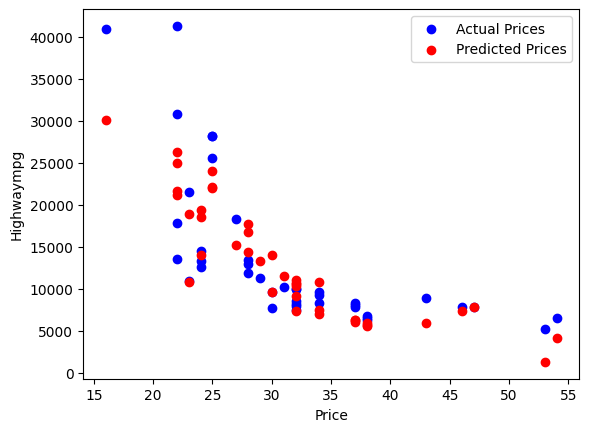

In [15]:
plt.scatter(x_test.iloc[:, 0], y_test, label='Actual Prices', color='blue')
plt.scatter(x_test.iloc[:, 0], model_regresi_pred, label='Predicted Prices', color='red')
plt.ylabel('Highwaympg')
plt.xlabel('Price')
plt.legend()
plt.show()

17. Lakukan tes prediksi harga mobil menggunakan inputan nilai-nilai highwaympg = 32, curbweight = 2338, dan horsepower = 75. Berapa prediksi harganya?

In [16]:
X = np.array([[32, 2338, 75]])
harga_X = model_regresi.predict(X)
harga_X

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8860.16924466])

18. Ubah nilai array tersebut menjadi integer.

In [17]:
modify_to_int = int(harga_X)
modify_to_int

C:\Users\ACER\AppData\Local\Temp\ipykernel_12644\94205429.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modify_to_int = int(harga_X)


8860

19. Lakukan evaluasi untuk mengetahui nilai MAE, MSE, dan RMSE

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, model_regresi_pred)
print(f"Mean Absolute Error (MAE): {mae: .2f}")

mse = mean_squared_error(y_test, model_regresi_pred)
print(f"Mean Squared Error (MSE): {mse: .2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse: .2f}")

Mean Absolute Error (MAE):  3028.21
Mean Squared Error (MSE):  17659419.44
Root Mean Squared Error (RMSE):  4202.31


In [19]:
import pickle
filename = "model_prediksi_harga_mobil.sav"
pickle.dump(model_regresi, open(filename, 'wb'))